In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import spline
%matplotlib inline
import csv
import pandas as pd
import matplotlib

In [2]:
y1pos = np.genfromtxt('dmd11.txt',delimiter=' ')
y2pos = np.genfromtxt('dmd21.txt',delimiter=' ')
y1neg = np.genfromtxt('dmd11neg.txt',delimiter=' ')
y2neg = np.genfromtxt('dmd21neg.txt',delimiter=' ')

In [3]:
x1pos=np.arange(.2,6.4,.2)
x1neg=np.arange(-6.2,0,.2)
x2pos=np.arange(.2,6.4,.2)
x2neg=np.arange(-6.2,0,.2)

In [4]:
y1=np.append(y1neg,y1pos)
x1=np.append(x1neg,x1pos)
y2=np.append(y2neg,y2pos)
x2=np.append(x2neg,x2pos)

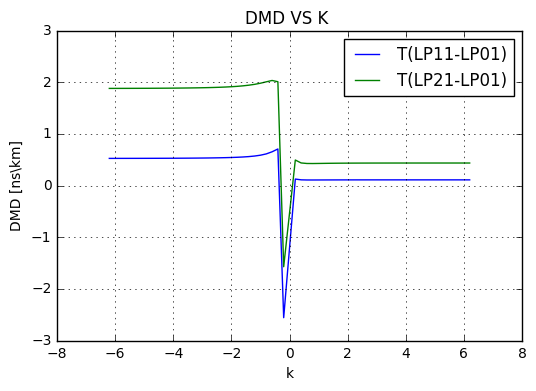

In [5]:
xa=np.linspace(x1.min(),x1.max(),1000)
xb=np.linspace(x2.min(),x2.max(),1000)
ya=spline(x1,y1,xa)
yb=spline(x2,y2,xb)
plt.plot(x1,y1,label='T(LP11-LP01)')
plt.plot(x2,y2,label='T(LP21-LP01)')
plt.xlabel("k")
plt.ylabel("DMD [ns\km]")
plt.title("DMD VS K ")
plt.legend(loc='upper right')
plt.grid()
#plt.show()
plt.savefig('dmd_vs_k.png')

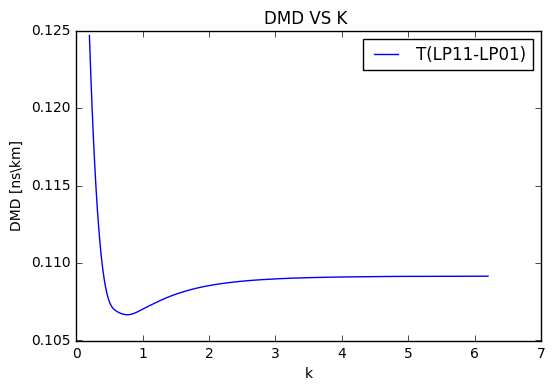

In [6]:
plt.figure()
#plt.rcParams.update({'font.size': 8})
#plt.figure(figsize=(15,10))
x1pos_smooth=np.linspace(x1pos.min(),x1pos.max(),300)
y1pos_smooth=spline(x1pos,y1pos,x1pos_smooth)

plt.plot(x1pos_smooth,y1pos_smooth,label='T(LP11-LP01)')
plt.xlabel("k")
plt.ylabel("DMD [ns\km]")
plt.title("DMD VS K ")
plt.legend(loc='upper right')

plt.savefig('seperate_dmd1.png')

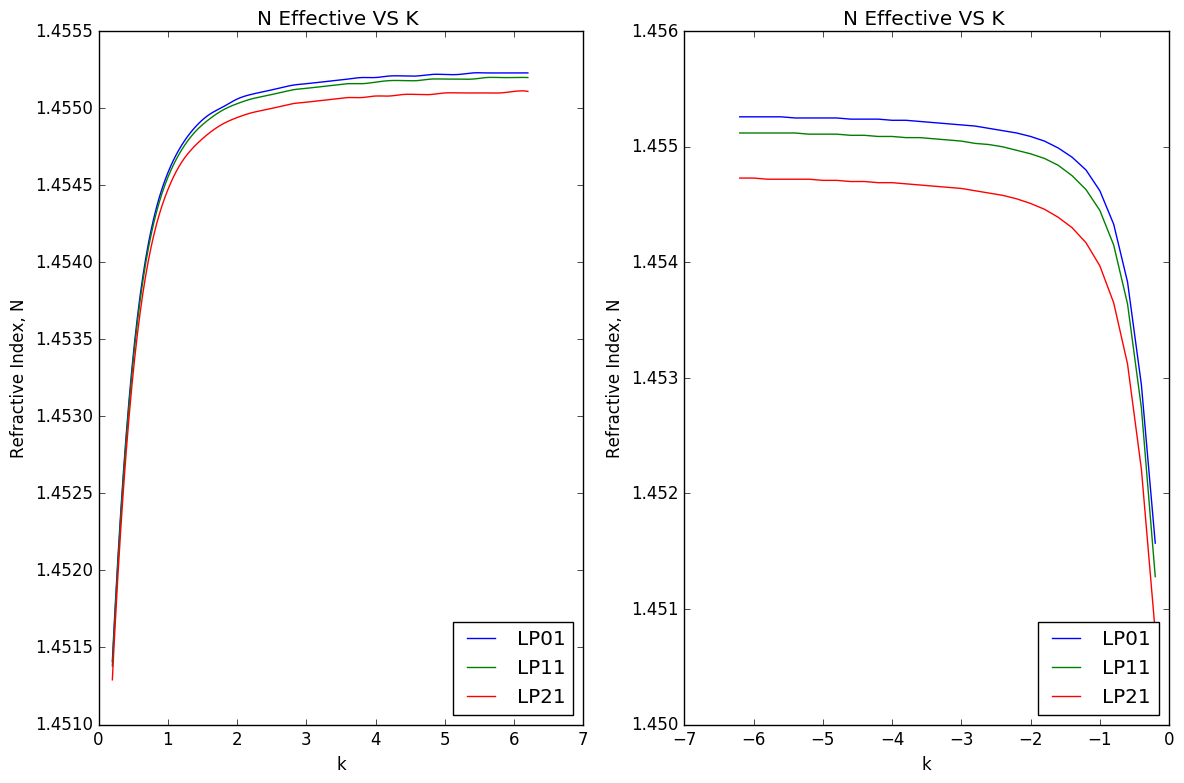

In [8]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,8))
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

neff0 = np.genfromtxt('neff_01.txt',delimiter=' ')
neff1 = np.genfromtxt('neff_11.txt',delimiter=' ')
neff2 = np.genfromtxt('neff_21.txt',delimiter=' ')
#splie fit
neff0_smooth=spline(x1pos,neff0,x1pos_smooth)
neff1_smooth=spline(x1pos,neff1,x1pos_smooth)
neff2_smooth=spline(x1pos,neff2,x1pos_smooth)

plt.subplot(1,2,1)
plt.plot(x1pos_smooth,neff0_smooth,label='LP01')
plt.plot(x1pos_smooth,neff1_smooth,label='LP11')
plt.plot(x1pos_smooth,neff2_smooth,label='LP21')
plt.xlabel("k")
plt.ylabel("Refractive Index, N")
plt.title("N Effective VS K ")
plt.legend(loc='lower right')
plt.gca().yaxis.set_major_formatter(y_formatter)
#plt.show()
###########
neff0neg = np.genfromtxt('neff_01neg.txt',delimiter=' ')
neff1neg = np.genfromtxt('neff_11neg.txt',delimiter=' ')
neff2neg = np.genfromtxt('neff_21neg.txt',delimiter=' ')
#splie fit
neff0neg_smooth=spline(x1pos,neff0,x1neg_smooth)
neff1neg_smooth=spline(x1pos,neff1,x1neg_smooth)
neff2neg_smooth=spline(x1pos,neff2,x1neg_smooth)

plt.subplot(1,2,2)
plt.plot(x1neg,neff0neg,label='LP01')
plt.plot(x1neg,neff1neg,label='LP11')
plt.plot(x1neg,neff2neg,label='LP21')
plt.xlabel("k")
plt.ylabel("Refractive Index, N")
plt.title("N Effective VS K ")
plt.legend(loc='lower right')
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.tight_layout()
#plt.show()
plt.savefig('neffective_curve.png')